# Pasta Image Labeler

The purpose of this code is to quickly accept / reject training images by eye. Will only work on MacOS.

Goal: 
- open a preview of an image
- press enter to accept -- leaving the image in place
- press any other key -- moving the image to a "reject" folder

In [1]:
# imports
import numpy as np
import subprocess as sp
from os import path
import getch

## open a single test image

In [42]:
test_image_path = '/Users/jarredgreen/Downloads/instalooter/carbonara/2081350632616431848.jpg'
image_name = path.basename(test_image_path)

In [3]:
with sp.Popen(["qlmanage", "-p", test_image_path]) as pp:
    x = input("%s ?" % image_name)
    if x == '':
        print("YES: the image %s is accepted" % image_name)
    else:
        print("NO : the image %s is rejected" % image_name)

    # then close the image with:    
    pp.terminate()

2081350632616431848.jpg ? 


YES: the image 2081350632616431848.jpg is accepted


## try with Getch

This works better!!

## Resize image

In [2]:
import imageio
import skimage
import matplotlib.pyplot as plt
import math

In [305]:
test_image_notSquare = '/Users/jarredgreen/Documents/Deepasta/deepasta/ImageLabeler/test_images/carbonara/2147274122770605680.jpg'

# im = imageio.imread(test_image_path)
im = imageio.imread(test_image_notSquare)

# resize
# im2 = skimage.transform.resize(im, [128, 128])

# rotate
#im2 = skimage.transform.rotate(im, [90])

In [306]:
def resize_image(im, dim, quiet=True):
    '''resizes image im to square with dimensions dim'''
    
    if not quiet: print('rescaling to %s x %s' % (dim, dim))
    return skimage.transform.resize(im, [dim, dim])

## center crop

In [249]:
def crop_center(im, quiet=True):
    '''Crops an image to square about the center using skimage
       needs: imageio, skimage, math
    '''
    
    if not quiet: print('cropping to a square')
    if not quiet: print('old shape: %s' % str(im.shape))
    photo_dim = np.array(im.shape)[:2]
    bigger_dim, smaller_dim = np.amax(photo_dim), np.amin(photo_dim)
    height, width = photo_dim[0], photo_dim[1]

    diff1 = math.ceil((bigger_dim - smaller_dim ) / 2)
    diff2 = math.floor((bigger_dim - smaller_dim ) / 2)

    if width == height:
        if not quiet: print('already square!')
    elif width > height:
        im = skimage.util.crop(im, ((0,0),(diff1,diff2),(0,0)))
        if not quiet: print('new shape: %s' % str(im.shape))
    else:
        im = skimage.util.crop(im, ((diff1,diff2),(0,0),(0,0)))
        if not quiet: print('new shape: %s' % str(im.shape))
    
    return im

cropping to a square
old shape: (128, 128, 3)
already square!
rescaling to 128 x 128


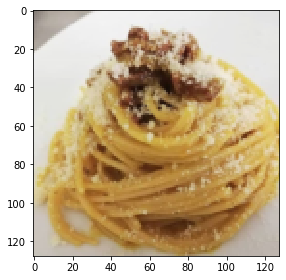

In [311]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    im = crop_center(im, quiet=False)
    im = skimage.img_as_ubyte(resize_image(im, 128, quiet=False))
    skimage.io.imshow(im)
    io.show()

## write the image

In [265]:
imageio.imwrite('~/Downloads/newimage.jpg', skimage.img_as_ubyte(im))

In [282]:
def write_image(image, path, filename, quiet=True):
    '''writes the new image!'''
    imageio.imwrite('%s/%s' % (path, filename), skimage.img_as_ubyte(im))
    if not quiet: print('image saved to %s/%s' % (path, filename))

In [283]:
write_image(im, '~/Downloads', 'newimage2.jpg', quiet=False)

image saved to ~/Downloads/newimage2.jpg


## entire processing chain

In [286]:
def process_image(path, image_name, destination_folder, quiet=False):
    #open_image
    im = imageio.imread(path)
    im = crop_center(im, quiet=quiet)
    im = resize_image(im, 128, quiet=quiet)
    write_image(im, '~/Downloads', 'newimage2.jpg', quiet=quiet)

In [287]:
process_image(test_image_notSquare, 'newimage2.jpg', quiet=False)

cropping to a square
old shape: (543, 750, 3)
new shape: (543, 543, 3)
rescaling to 128 x 128
image saved to ~/Downloads/newimage2.jpg


# Instaloader

In [3]:
import instaloader

In [4]:
# Get instance
L = instaloader.Instaloader()

In [9]:
L.get_hashtag_posts('cat')

<generator object Instaloader.get_hashtag_posts at 0x1c1ee00c78>